In [1]:
import math
import random
import torch
import numpy as np
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import copy
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm
import time


from scipy.interpolate import griddata

D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#global veriable 
Uniform_low_bound=0
Uniform_up_bound=1
Agent_number_n=100

number_of_groups=2

Normal_loc=0.03
Normal_scale=0.01
Normal_loc1=0.95
Normal_loc2=0.05
Normal_scale1=0.02
Normal_scale2=0.02
Distribution_number=10000#00


In [3]:
class Foo(object):

    def __init__(self, test_item, test_change_item, deadline):
        self.test_item = test_item
        self.test_change_item = test_change_item
        self.deadline = deadline

    def __lt__(self, other):
        return self.test_change_item < other.test_change_item

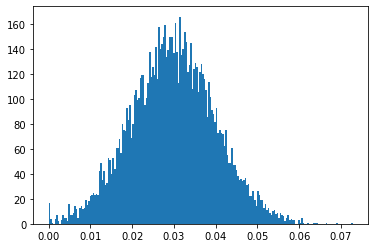

1000
9000


In [4]:
seed = 7
np.random.seed(seed)
exec(open('distribution/normal.py').read())
#exec(open('distribution/uniform.py').read())
#exec(open('distribution/normal.py').read())
for i in range(len(value_list)):
    for j in range(len(value_list[0])):
        if(value_list[i][j]<=0):
            value_list[i][j]=0
        if(value_list[i][j]>=1):
            value_list[i][j]=1
            
value_list1=np.array(value_list)
for i in range(min(Agent_number_n,1)):
    pa=value_list1[:,i]
    plt.hist(pa,bins=200)
    plt.show()

X_train,  X_test = train_test_split(value_list, test_size=0.9, random_state=seed)

dataset_size = len(X_train)
print(dataset_size)
#print(X_train[:100])
print(len(X_test))
#run_cs()

In [5]:
def cost_sharing_with_deadline(test,t_c,target):
    temp_max_delay_list=[0 for i in range(len(test))]
    temp_sum_delay=0
    result=False
    
    started=0
    for k in range(len(test),0,-1):
        count=0;
        delay=0;
        for ii in range(started,len(test)):
            item= test[ii]
            started=ii
            if(item+1e-9>=target/k):
                count+=len(test)-ii;
                break;
            
        if(count>=k):
            temp_sum_delay+=t_c[0]*started;
            for ii in range(0,started):
                temp_max_delay_list[ii]=t_c[ii]
            result=True
            break;
        if(k<=1):
            #print(test,number_n);
            temp_max_delay_list=t_c
            temp_sum_delay=sum(t_c);
            result=False
            
    return temp_max_delay_list,temp_sum_delay,result




def cost_sharing_with_deadline_free(n,_i,numbers_of_people_will_pay,started_k):
    
    for k in range(started_k,0,-1):
        if(n-_i<=k):
            x=k-1
        else:
            x=k
        #print(n,_i,x,numbers_of_people_will_pay[x],k)
        if(numbers_of_people_will_pay[x]>=k):
            return True,k
        
            
    return False,0





#Cost Sharing
def run_cs(deadline_list):
    sum_delay=0
    max_delay=0
    test_number=0
    seconds_start=time.time()
    for i in range(len(X_test)):
#        if(i%1000==0):
#            seconds=time.time()
#            print("times: ",seconds-seconds_start)
        test_number+=1
        temp_max_delay=0
        temp_delay=0
        test = copy.deepcopy(X_test[i])
        #test_change = copy.deepcopy(X_test[i]);
        test_change_temp = []
        Foo_list = []
        
#         seconds=time.time()
#         print("times: ",seconds-seconds_start)
        
        
        for j in range(len(test)):
            test_change_temp.append(test[j] * deadline_list[j])
            Foo_list.append(Foo(test[j],test_change_temp[j],deadline_list[j]))
            
        Foo_list.sort(reverse=False)
        

        for j in range(len(test)):
            test[j]=Foo_list[j].test_item
            test_change_temp[j]=Foo_list[j].test_change_item
            deadline_list[j]=Foo_list[j].deadline

        test_change = copy.deepcopy(test_change_temp);
        
        numbers_of_people_will_pay = [-10 for ii in range(len(test_change)+2)]#pay 1/k
        
#         seconds=time.time()
#         print("times: ",seconds-seconds_start)
        
        k = 1
        started=len(test_change)-1
        end_k=-10
        for j in range(len(test_change)):
            if(k<=len(test_change)):
                for people_id in range(started,-1,-1):
                    if(test_change[people_id]+1e-9>=1.0/k):
                        started=people_id
                        numbers_of_people_will_pay[k]=len(test_change)-people_id
                        end_k=len(test_change)-people_id
                    else:
                        k+=1
                        break;
                    
        for j in range(k,len(test_change)+1):
            numbers_of_people_will_pay[j]=end_k
            
        deadlist_new=copy.deepcopy(deadline_list)
        
        temp_max_delay_list,temp_sum_delay,judge_i =  cost_sharing_with_deadline(test_change,
                        deadlist_new,1.0)
        
#         seconds=time.time()
#         print("times: ",seconds-seconds_start)
        
#         print()
#         print(test_change)
#         print(temp_max_delay_list)
#         print(temp_sum_delay)
#         print(judge_i)
        
#         #         print(test_change)
#         oo=[]
#         for j in range(1,len(test_change)+1):
#             oo.append( round(1.0/j, 2))

#         print(oo)
#         print(numbers_of_people_will_pay)
#         print()

        judge_i= True
        started_k = len(test)
        for _i in range(len(test_change)):
            if judge_i:
                judge_i,started_k =  cost_sharing_with_deadline_free(len(test_change),
                    _i,numbers_of_people_will_pay,started_k)
            #print(judge_i,_i,started_1,1.0/(started_1+0.001))
            
            #print(_i,judge_i,started_k)
            started_k+=1
            if(judge_i==False):
                temp_sum_delay += (1.0-deadline_list[_i])
                temp_max_delay_list[_i] += (1.0-deadline_list[_i])
#         print("count_number",count_number)
        #print(judge_i)
#         seconds=time.time()
#         print("times: ",seconds-seconds_start)
        
        max_delay+=max(temp_max_delay_list)
        
        sum_delay+=temp_sum_delay
        
    print("deadline: ",deadline_list[0])
    print("sum_delay: ",sum_delay/test_number)
    print("max_delay: ",max_delay/test_number)
    print()
    return max_delay/test_number,sum_delay/test_number
    
    


In [6]:
average_max_delay = 1e9
average_sum_delay = 1e9

In [7]:
devided=100

for deadline_1 in range(1,devided+1):
    print(deadline_1/devided)
    deadline_free = (devided-deadline_1) /devided
    deadline = (deadline_1) /devided
    deadline_list = [deadline for i in range(Agent_number_n)]
    temp_average_max_delay,temp_average_sum_delay = run_cs(deadline_list)  # deadline=0 free get; deadline=1 full payment 
    
    average_max_delay= min(average_max_delay,temp_average_max_delay)
    average_sum_delay= min(average_sum_delay,temp_average_sum_delay)
    
    print()
    

0.01
deadline:  0.01
sum_delay:  99.99999999999999
max_delay:  1.0


0.02
deadline:  0.02
sum_delay:  100.00000000000001
max_delay:  1.0


0.03
deadline:  0.03
sum_delay:  99.99999999999999
max_delay:  1.0


0.04
deadline:  0.04
sum_delay:  99.99999999999999
max_delay:  1.0


0.05
deadline:  0.05
sum_delay:  100.00000000000001
max_delay:  1.0


0.06
deadline:  0.06
sum_delay:  99.99999999999999
max_delay:  1.0


0.07
deadline:  0.07
sum_delay:  100.00000000000001
max_delay:  1.0


0.08
deadline:  0.08
sum_delay:  100.00000000000001
max_delay:  1.0


0.09
deadline:  0.09
sum_delay:  99.99999999999999
max_delay:  1.0


0.1
deadline:  0.1
sum_delay:  100.00000000000001
max_delay:  1.0


0.11
deadline:  0.11
sum_delay:  100.00000000000001
max_delay:  1.0


0.12
deadline:  0.12
sum_delay:  99.99999999999999
max_delay:  1.0


0.13
deadline:  0.13
sum_delay:  100.00000000000001
max_delay:  1.0


0.14
deadline:  0.14
sum_delay:  99.99999999999999
max_delay:  1.0


0.15
deadline:  0.15
sum_dela

In [8]:
print(average_sum_delay)

fail_rate = average_sum_delay/Agent_number_n
print(fail_rate)
success_rate = 1.0 - fail_rate

2.441222222222222
0.02441222222222222


In [9]:
from scipy.stats import uniform

In [10]:
devided1=10000
total_sum_delay_low_bound = 1e9

pdf=[0 for i in range(devided1+1)]
cdf=[0 for i in range(devided1+1)]


number = len(X_test)*len(X_test[0])
for i in range(len(X_test)):
    test = X_test[i]
    for j in range(len(test)):
        x=int(test[j]*devided1)
        x = max(0,x)
        x = min(devided1,x)
        pdf[x] += 1.0 / number


cdf[0] = pdf[0]
for i in range(1,devided1+1):
    cdf[i] = cdf[i-1] + pdf[i]

print(devided1,number)
print(cdf[int(devided1/2)])
for deadline_1 in range(1,devided1):
    for price_1 in range(int(Agent_number_n),1,-1):
        deadline_free = (devided1-deadline_1) /devided1
        deadline = (deadline_1) /devided1
        price = (1.0) /price_1
        
        expect_pay =  success_rate/Agent_number_n
        
        #print(price,deadline)
        
            
        #st: Possible * p >= expect_pay
        #delay: (1.0-Possible)*deadline 
        
        if(int (price/deadline*devided1 )>=devided1):
            Possible=  1.0 - 1.0
        else:
            Possible = 1.0 - cdf[int (price/deadline*devided1 )]
            #Possible = 1.0 - uniform.ppf(price/deadline)
        st =  Possible * price >= expect_pay
        total_delay = (1.0-Possible)*deadline *Agent_number_n
        
        #dprint(deadline,price,total_delay)
        
        if (st and total_delay <= total_sum_delay_low_bound ):
            
            total_sum_delay_low_bound = min(total_sum_delay_low_bound,total_delay)
            print()
            print("success","deadline:",deadline,"price:",price,"delay:",total_delay)
            print(Possible)
            print()

        
print(total_sum_delay_low_bound)

10000 900000
0.9999999999999566

success deadline: 0.5598 price: 0.012987012987012988 delay: 13.889197799999566
0.7518900000000077


success deadline: 0.5599 price: 0.01282051282051282 delay: 13.376633111110712
0.761088888888896


success deadline: 0.5624 price: 0.01282051282051282 delay: 13.263704088888492
0.7641588888888959


success deadline: 0.5626 price: 0.012658227848101266 delay: 12.756704955555193
0.7732544444444509


success deadline: 0.5631 price: 0.0125 delay: 12.269135633332997
0.7821144444444504


success deadline: 0.5638 price: 0.012345679012345678 delay: 11.794758644444128
0.7907988888888945


success deadline: 0.5664 price: 0.012345679012345678 delay: 11.688356266666359
0.7936377777777832


success deadline: 0.5673 price: 0.012195121951219513 delay: 11.224030499999715
0.802150000000005


success deadline: 0.5684 price: 0.012048192771084338 delay: 10.76341186666641
0.8106366666666712


success deadline: 0.5711 price: 0.012048192771084338 delay: 10.658185477777527
0.81337


success deadline: 0.9901 price: 0.01 delay: 2.3279451222222156
0.9764877777777778

2.3279451222222156


In [11]:
x = int (price/deadline*devided1 )
print(price/deadline,x,cdf[x])

0.5000500050005 5000 0.9999999999999566


In [12]:
print("sum_delay_low_bound:",total_sum_delay_low_bound,"sum_delay:",average_sum_delay)
print("max_delay:",average_max_delay)
print("{:.4%}".format(average_sum_delay/ total_sum_delay_low_bound))

sum_delay_low_bound: 2.3279451222222156 sum_delay: 2.441222222222222
max_delay: 0.6251666666666105
104.8660%


In [13]:
print(total_sum_delay_low_bound)

2.3279451222222156
